In [122]:
import pandas as pd
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json

import numpy as np
import time
from itertools import groupby
def scroll(driver, timeout):
    # get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        for i in range(timeout):
            # scroll down
            driver.find_element(By.XPATH,"/html/body/div[7]/div[2]/div/div[1]/div[3]/div/div/div[2]/div/table").send_keys(Keys.END)

            # wait for page to load
            time.sleep(1)

        # get new scroll height and compare to last height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            # If heights are the same it will exit the function
            break
        last_height = new_height

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

url = 'https://services1.arcgis.com/99lidPhWCzftIe9K/arcgis/rest/services/HousingUnitInventory/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=false&outSR=4326&f=json'
url1= 'https://opendata.gis.utah.gov/datasets/utah::utah-housing-unit-inventory/about'
turl = "https://www.aicrowd.com/challenges/insurance-pricing-game/submissions"

In [123]:
driver.get(url)

In [69]:
pre = driver.find_element(By.TAG_NAME,"pre").text
data = json.loads(pre)

df = pd.json_normalize(data['features'])

new_column_names = {col: col.replace('attributes.', '') for col in df.columns}
df.rename(columns=new_column_names, inplace=True)
df.set_index('OBJECTID', inplace=True)

In [70]:
df

,UNIT_ID,TYPE,SUBTYPE,IS_OUG,UNIT_COUNT,DUA,ACRES,TOT_BD_FT2,TOT_VALUE,APX_BLT_YR,BLT_DECADE,CITY,COUNTY,SUBCOUNTY,Shape__Area,Shape__Length
OBJECTID,,,,,,,,,,,,,,,,
1,1,single_family,single_family,1,18,9.339,1.927313,26873,4935167,2002,2000,Woods Cross,Davis,South Davis County,13663.433594,576.740589
2,2,single_family,single_family,1,34,5.609,6.061556,47226,10518205,2007,2000,Centerville,Davis,South Davis County,43042.921875,934.399608
3,3,single_family,single_family,1,40,9.383,4.263039,52295,9844160,2007,2000,Centerville,Davis,South Davis County,30273.128906,1323.902677
4,4,single_family,single_family,1,29,4.463,6.497216,55105,12752774,2016,2010,Centerville,Davis,South Davis County,46168.941406,925.352925
5,5,single_family,single_family,1,24,6.170,3.890075,19183,4691610,2011,2010,Farmington,Davis,South Davis County,27656.757812,738.090710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1996,single_family,single_family,0,1,4.751,0.210503,1515,347000,1976,1970,North Salt Lake,Davis,South Davis County,1490.750000,154.555647
1997,1997,single_family,single_family,0,1,4.697,0.212897,1470,341000,1976,1970,North Salt Lake,Davis,South Davis County,1507.695312,157.908761
1998,1998,single_family,single_family,0,1,4.683,0.213535,1477,326000,1976,1970,North Salt Lake,Davis,South Davis County,1512.195312,158.134178


In [99]:
driver.get(url1)

In [100]:
driver.find_element(By.ID,"ember99").click()


In [101]:
driver.find_element(By.ID,"ember241-title").click()
driver.find_element(By.ID,"ember241-title").click()

In [ ]:
table =driver.find_element(By.XPATH,"/html/body/div[7]/div[2]/div/div[1]/div[3]/div/div/div[2]/div/table") 
table

<selenium.webdriver.remote.webelement.WebElement (session="40a6ce48e958ab31b0b9b5c9df186455", element="F52F23C00A0F7F69ACAB7F095E22DAC4_element_46")>

In [ ]:
table.send_keys(Keys.PAGE_DOWN)

In [103]:
def get_all_rows(driver, table_locator):
    # Scroll to the bottom of the page to ensure all rows are loaded
    last_row_count = 0

    # while True:
    #     # Record the current number of rows
    #     current_row_count = len(driver.find_elements(By.XPATH, table_locator + "//tr"))

    #     driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    #     # Wait for a short time to let new rows load
    #     scroll(driver,10)

    #     # Get the new number of rows
    #     new_row_count = len(driver.find_elements(By.XPATH, table_locator + "//tr"))

    #     # If the number of rows hasn't increased, break the loop
    #     if new_row_count == current_row_count:
    #         break

    #     # Update the last row count
    #     last_row_count = new_row_count

    html = driver.page_source

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')

    # Find the table in the parsed HTML
    table = soup.find('table')

    # Check if the table was found
    if table:
        # Extract all rows from the table
        all_rows = table.find_all('tr')
        return all_rows
    else:
        print("Table not found.")
        return []    


# Replace with the correct XPath or other locator for your table
table_locator = "/html/body/div[7]/div[2]/div/div[1]/div[3]/div/div/div[2]/div/table"

all_rows = get_all_rows(driver, table_locator)

# Now 'all_rows' contains all the rows in the table
len(all_rows)

21801

In [104]:
all_rows1=all_rows

In [112]:
header_columns = [span.get_text(strip=True) for span in all_rows1[0].find_all('span', {'role': 'button'})]

# Initialize an empty list to store row data
all_rows_data = []

# Iterate through each row
for row_html in all_rows1:
    # Extract data from each cell in the row
    data = [cell.get_text(strip=True) for cell in row_html.find_all('td', {'role': 'gridcell'})]
    
    # Create a dictionary for the row
    row_dict = dict(zip(header_columns, data))
    
    # Append the row data to the list
    all_rows_data.append(row_dict)

# Create a DataFrame from the list of row data
df = pd.DataFrame(all_rows_data)


In [116]:
df.dropna(inplace=True)
df

,UNIT_ID,TYPE,SUBTYPE,IS_OUG,UNIT_COUNT,DUA,ACRES,TOT_BD_FT2,TOT_VALUE,APX_BLT_YR,BLT_DECADE,CITY,COUNTY,SUBCOUNTY,Shape__Area,Shape__Length
1,"146,644",single_family,single_family,1,583,1.27,458.888,"3,528,545","550,840,200","2,019","2,010",Sandy,Salt Lake,Southeast Salt Lake County,"3,222,044.828","10,972.598"
2,"391,092",single_family,single_family,1,641,4.9,130.817,"1,525,269","253,029,578","2,013","2,010",North Salt Lake,Davis,South Davis County,"926,988.477","4,009.061"
3,"391,629",multi_family,condo,1,424,119.822,3.539,"1,226,704","177,524,300","2,004","2,000",Salt Lake City,Salt Lake,North Salt Lake County,"25,007.223",745.823
4,"387,152",multi_family,condo,1,357,196.182,1.82,"661,616","167,118,800","1,983","1,980",Salt Lake City,Salt Lake,North Salt Lake County,"12,858.336",463.557
5,"387,183",multi_family,condo,1,167,543.412,0.307,"232,991","144,316,300","2,011","2,010",Salt Lake City,Salt Lake,North Salt Lake County,"2,171.895",187.501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21796,"53,134",single_family,single_family,0,1,3.404,0.294,"3,432","709,000","2,015","2,010",Kaysville,Davis,South Davis County,"2,093.48",197.192
21797,"93,987",single_family,single_family,0,1,2.851,0.351,"3,018","709,000","2,003","2,000",Ogden,Weber,South Weber County,"2,510.375",210.261
21798,"99,156",single_family,single_family,0,1,2.423,0.413,"2,754","709,000","2,004","2,000",South Ogden,Weber,South Weber County,"2,951.859",222.862
21799,"134,657",single_family,single_family,0,1,2.119,0.472,"2,273","709,000","2,016","2,010",Pleasant View,Weber,North Weber County,"3,391.539",241.691


In [108]:
soup = BeautifulSoup(all_rows1, 'html.parser')


columns = [cell['data-col'] for cell in soup.find_all('td', {'role': 'gridcell'})]
data = [cell.get_text() for cell in soup.find_all('td', {'role': 'gridcell'})]

# Create a dictionary to construct a DataFrame
data_dict = dict(zip(columns, data))

# Create a DataFrame from the dictionary
df = pd.DataFrame([data_dict])

TypeError: expected string or bytes-like object

In [ ]:
len(all_rows)

26

In [ ]:
scroll(driver,10)

In [124]:
pre = driver.find_element(By.TAG_NAME,"pre").text
data = json.loads(pre)
print(pre)

{"objectIdFieldName":"OBJECTID","uniqueIdField":{"name":"OBJECTID","isSystemMaintained":true},"globalIdFieldName":"","geometryProperties":{"shapeAreaFieldName":"Shape__Area","shapeLengthFieldName":"Shape__Length","units":"esriMeters"},"geometryType":"esriGeometryPolygon","spatialReference":{"wkid":4326,"latestWkid":4326},"fields":[{"name":"OBJECTID","type":"esriFieldTypeOID","alias":"OBJECTID","sqlType":"sqlTypeOther","domain":null,"defaultValue":null},{"name":"UNIT_ID","type":"esriFieldTypeInteger","alias":"UNIT_ID","sqlType":"sqlTypeOther","domain":null,"defaultValue":null},{"name":"TYPE","type":"esriFieldTypeString","alias":"TYPE","sqlType":"sqlTypeOther","length":26,"domain":null,"defaultValue":null},{"name":"SUBTYPE","type":"esriFieldTypeString","alias":"SUBTYPE","sqlType":"sqlTypeOther","length":44,"domain":null,"defaultValue":null},{"name":"IS_OUG","type":"esriFieldTypeString","alias":"IS_OUG","sqlType":"sqlTypeOther","length":2,"domain":null,"defaultValue":null},{"name":"UNIT_C

In [128]:
df1 = pd.json_normalize(data['features'])
new_column_names = {col: col.replace('attributes.', '') for col in df1.columns}
df1.rename(columns=new_column_names, inplace=True)
df1.set_index('OBJECTID', inplace=True)


In [136]:
df1.reset_index().drop(columns='OBJECTID')

,UNIT_ID,TYPE,SUBTYPE,IS_OUG,UNIT_COUNT,DUA,ACRES,TOT_BD_FT2,TOT_VALUE,APX_BLT_YR,BLT_DECADE,CITY,COUNTY,SUBCOUNTY,Shape__Area,Shape__Length
0,1,single_family,single_family,1,18,9.339,1.927313,26873,4935167,2002,2000,Woods Cross,Davis,South Davis County,13663.433594,576.740589
1,2,single_family,single_family,1,34,5.609,6.061556,47226,10518205,2007,2000,Centerville,Davis,South Davis County,43042.921875,934.399608
2,3,single_family,single_family,1,40,9.383,4.263039,52295,9844160,2007,2000,Centerville,Davis,South Davis County,30273.128906,1323.902677
3,4,single_family,single_family,1,29,4.463,6.497216,55105,12752774,2016,2010,Centerville,Davis,South Davis County,46168.941406,925.352925
4,5,single_family,single_family,1,24,6.170,3.890075,19183,4691610,2011,2010,Farmington,Davis,South Davis County,27656.757812,738.090710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,single_family,single_family,0,1,4.751,0.210503,1515,347000,1976,1970,North Salt Lake,Davis,South Davis County,1490.750000,154.555647
1996,1997,single_family,single_family,0,1,4.697,0.212897,1470,341000,1976,1970,North Salt Lake,Davis,South Davis County,1507.695312,157.908761
1997,1998,single_family,single_family,0,1,4.683,0.213535,1477,326000,1976,1970,North Salt Lake,Davis,South Davis County,1512.195312,158.134178
1998,1999,single_family,single_family,0,1,4.699,0.212812,1384,340000,1976,1970,North Salt Lake,Davis,South Davis County,1507.078125,157.869905


In [146]:
combined_df = pd.concat([df, df1], ignore_index=True)
combined_df.drop_duplicates(subset='UNIT_ID', keep='first',inplace=True)

In [155]:
columns_to_convert_to_int = ['UNIT_ID', 'UNIT_COUNT', 'DUA','ACRES','TOT_BD_FT2','TOT_VALUE','APX_BLT_YR','BLT_DECADE','Shape__Area','Shape__Length','IS_OUG']

# Convert specified columns to int
combined_df[columns_to_convert_to_int] = combined_df[columns_to_convert_to_int].replace(",","",regex=True).replace('', 0).astype(float)

combined_df.dtypes

UNIT_ID          float64
TYPE              object
SUBTYPE           object
IS_OUG           float64
UNIT_COUNT       float64
DUA              float64
ACRES            float64
TOT_BD_FT2       float64
TOT_VALUE        float64
APX_BLT_YR       float64
BLT_DECADE       float64
CITY              object
COUNTY            object
SUBCOUNTY         object
Shape__Area      float64
Shape__Length    float64
dtype: object

In [ ]:
df = pd.read_csv('./Utah_Housing_Unit_Inventory.csv',index_col='OBJECTID')
df

,UNIT_ID,TYPE,SUBTYPE,IS_OUG,UNIT_COUNT,DUA,ACRES,TOT_BD_FT2,TOT_VALUE,APX_BLT_YR,BLT_DECADE,CITY,COUNTY,SUBCOUNTY,SHAPE_Length,SHAPE_Area
OBJECTID,,,,,,,,,,,,,,,,
1,1,single_family,single_family,1,18,9.339,1.927313,26873.0,4935167.0,2002.0,2000,Woods Cross,Davis,South Davis County,576.740589,13663.427336
2,2,single_family,single_family,1,34,5.609,6.061556,47226.0,10518205.0,2007.0,2000,Centerville,Davis,South Davis County,934.399608,43042.936195
3,3,single_family,single_family,1,40,9.383,4.263039,52295.0,9844160.0,2007.0,2000,Centerville,Davis,South Davis County,1323.902677,30273.131808
4,4,single_family,single_family,1,29,4.463,6.497216,55105.0,12752774.0,2016.0,2010,Centerville,Davis,South Davis County,925.352925,46168.938217
5,5,single_family,single_family,1,24,6.170,3.890075,19183.0,4691610.0,2011.0,2010,Farmington,Davis,South Davis County,738.090710,27656.784835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391841,391841,multi_family,apartment,0,47,29.250,1.606838,22716.0,2827583.0,1993.0,1990,Clinton,Davis,North Davis County,477.329147,11482.698461
391842,391842,multi_family,apartment,0,65,57.450,1.131428,49324.0,5329100.0,1991.0,1990,Salt Lake City,Salt Lake,North Salt Lake County,401.037532,7983.025250
391843,391843,multi_family,apartment,0,187,14.627,12.784790,NaN,NaN,2019.0,2010,West Jordan,Salt Lake,Southwest Salt Lake County,1382.894989,89915.011776


In [ ]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_upper(sns.kdeplot)
g.map_lower(sns.kdeplot)

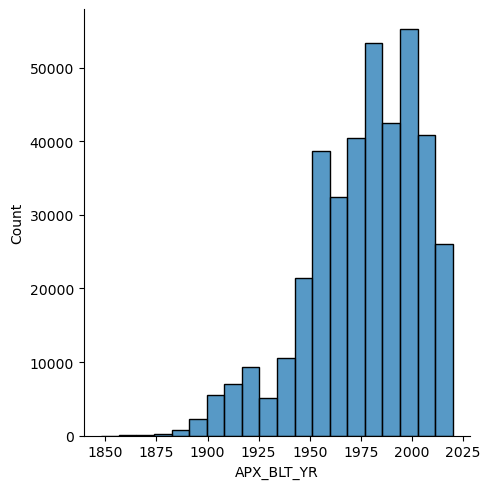

In [ ]:
sns.displot(df,x='APX_BLT_YR',bins=20)